In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.csv", encoding='Windows-1252')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace= True)

In [8]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [13]:
df['Target'] = le.fit_transform(df['Target'])

In [14]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
df.shape

(5572, 2)

# EDA

In [22]:
df['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

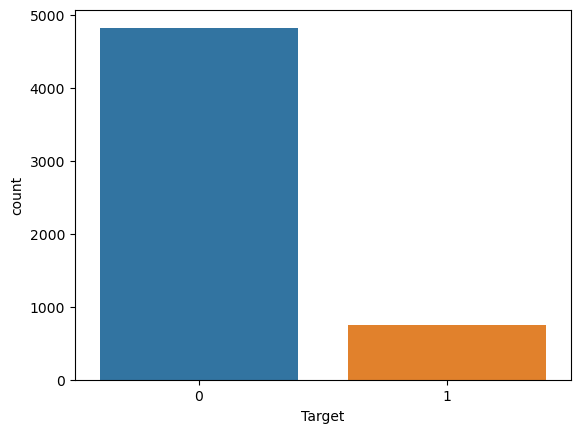

In [51]:
sns.countplot(x = 'Target', data =df)
plt.show()

<Axes: ylabel='Target'>

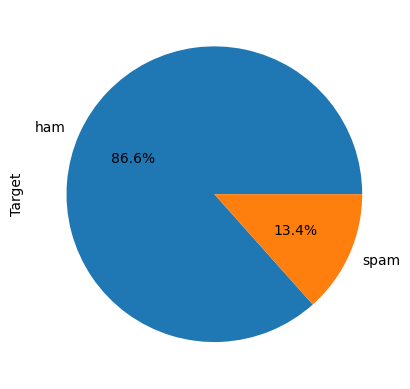

In [29]:
df['Target'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = ['ham', 'spam'])
plt.show()

In [30]:
import nltk

In [32]:
df['no_char'] = df['Text'].apply(len)        #calculating length of Text column

In [33]:
df.head()

,Target,Text,no_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
df['no_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))    #counting words in Text column

In [37]:
df.head()

,Target,Text,no_char,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
df['no_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))  #counting no. of sentences

In [43]:
df.head()

,Target,Text,no_char,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df[['no_char','no_words','no_sentences']].describe()

,no_char,no_words,no_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [48]:
# Decribe for Ham messages

df[df['Target'] == 0][['no_char','no_words','no_sentences']].describe()

,no_char,no_words,no_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [49]:
# Decribe for spam messages

df[df['Target'] == 1][['no_char','no_words','no_sentences']].describe()

,no_char,no_words,no_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


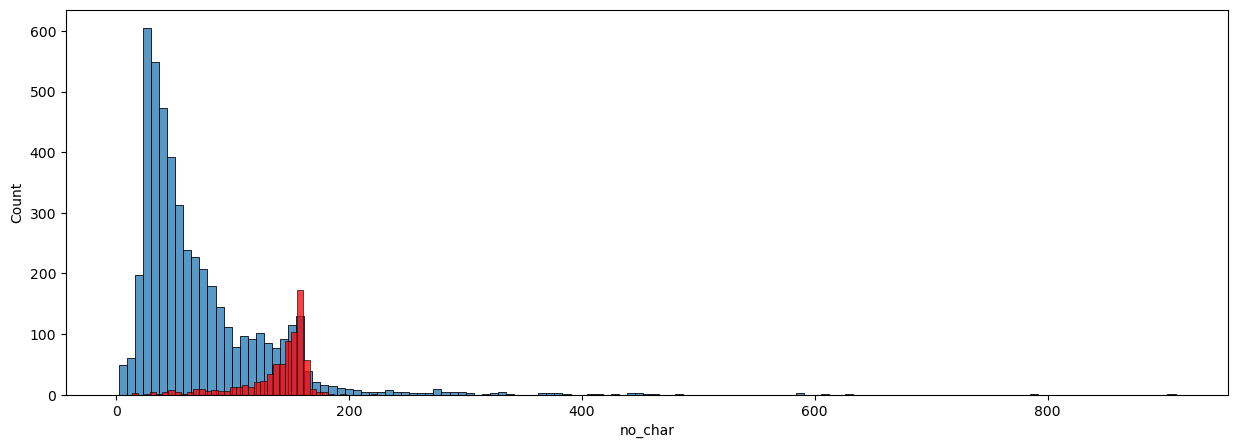

In [55]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['Target'] == 0]['no_char'])
sns.histplot(df[df['Target'] == 1]['no_char'], color='red')
plt.show()

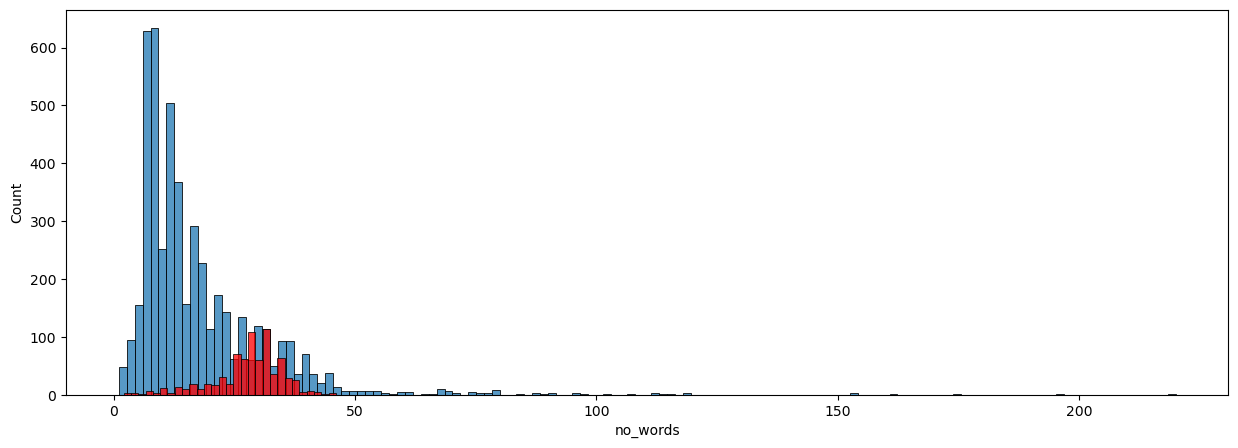

In [56]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['Target'] == 0]['no_words'])
sns.histplot(df[df['Target'] == 1]['no_words'], color='red')
plt.show()

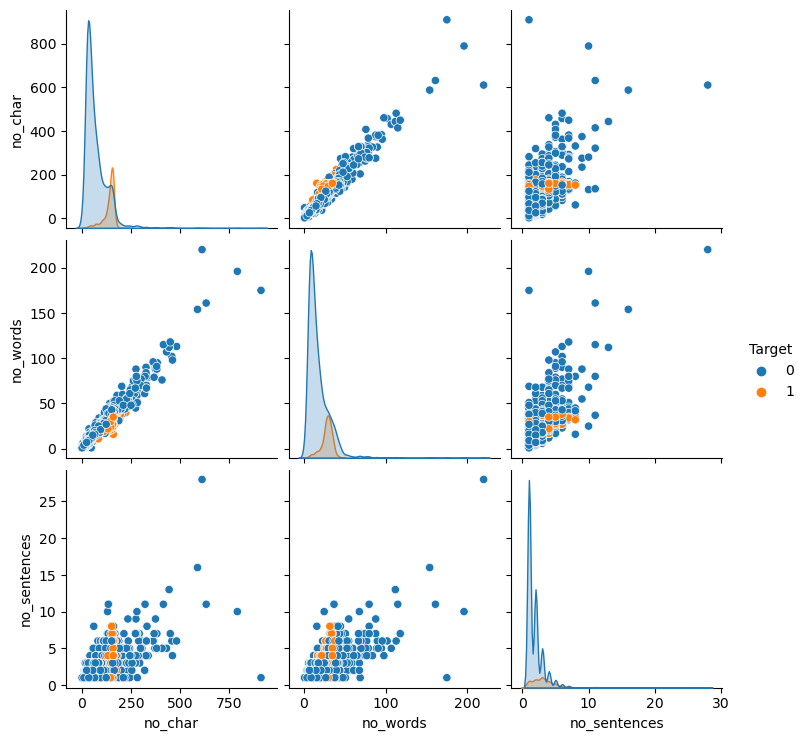

In [58]:
# To find out the relation between words, sentences, characters

sns.pairplot(df,hue = 'Target')

C:\Users\soura\AppData\Local\Temp\ipykernel_13368\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

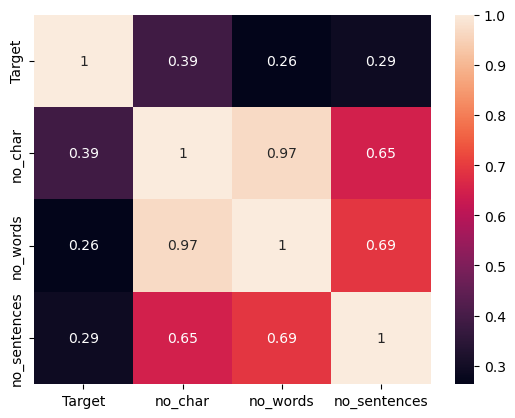

In [60]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [75]:
from nltk.corpus import stopwords
import string

In [84]:
from nltk.stem.porter import PorterStemmer

In [85]:
ps = PorterStemmer()

In [86]:
# here we are preprocessing our data

def trasnform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [88]:
# Performing trails on function

trasnform_text('HOW Are You Sourabh?20????I love mangoes' )

'sourabh 20 love mango'

In [89]:
df['Text'].apply(trasnform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object

In [90]:
df['transformed_text'] = df['Text'].apply(trasnform_text)

In [91]:
df.head()

,Target,Text,no_char,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [94]:
from wordcloud import WordCloud

In [98]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [100]:
spam_wc = wc.generate(df[df['Target'] ==1]['transformed_text'].str.cat(sep = " "))

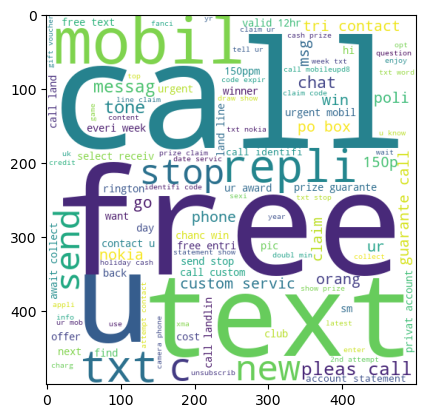

In [101]:
plt.imshow(spam_wc)

In [102]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))

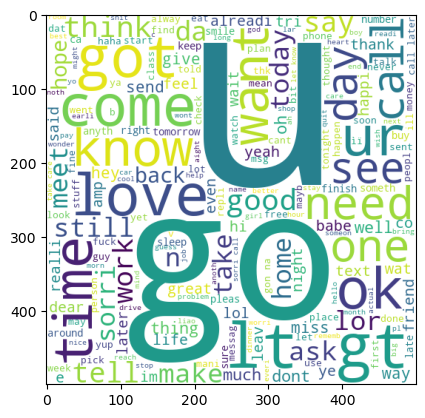

In [103]:
plt.imshow(ham_wc)

In [105]:
spam_corpus = []

for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [106]:
len(spam_corpus)

11490

In [107]:
from collections import Counter

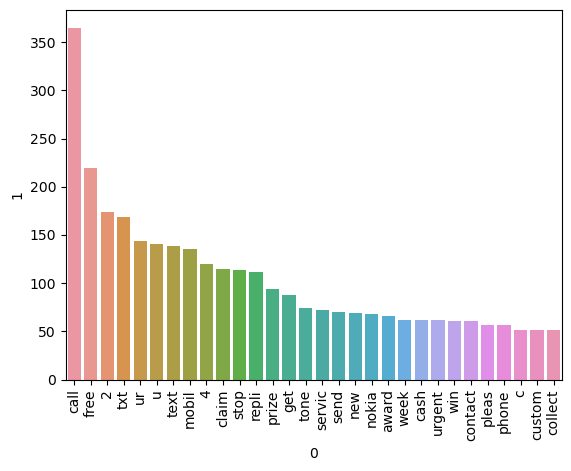

In [116]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [117]:
ham_corpus = []

for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [118]:
len(ham_corpus)

38205

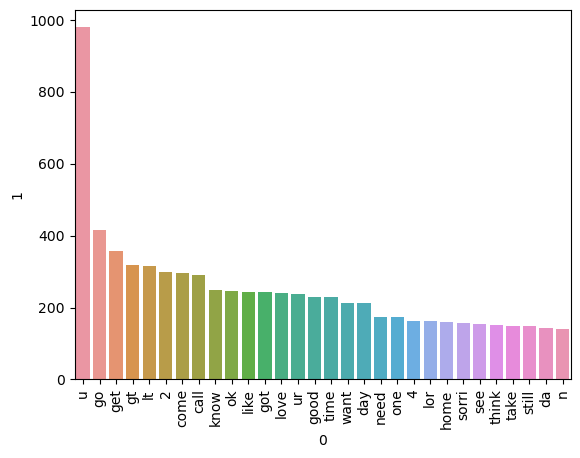

In [120]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [121]:
# For model building we have to convert our transformed_text column into vector format

In [153]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [154]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [155]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [156]:
X.shape

(5572, 6708)

In [157]:
y = df['Target'].values

In [158]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [170]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, precision_score

In [175]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
svc = SVC()

In [163]:
def model_train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('Confusion Matrix',confusion_matrix(y_test,y_pred))
    print('Precision Score',precision_score(y_test,y_pred))


# GaussianNB

In [164]:
model_train(gnb, X_train, y_train, X_test, y_test)

Accuracy Score:  0.8690582959641255
Confusion Matrix [[844 113]
 [ 33 125]]
Precision Score 0.5252100840336135


# MultinomialNB

In [165]:
model_train(mnb, X_train, y_train, X_test, y_test)

Accuracy Score:  0.957847533632287
Confusion Matrix [[957   0]
 [ 47 111]]
Precision Score 1.0


# BernoulliNB

In [166]:
model_train(bnb, X_train, y_train, X_test, y_test)

Accuracy Score:  0.9695067264573991
Confusion Matrix [[956   1]
 [ 33 125]]
Precision Score 0.9920634920634921


# LogisticRegression

In [169]:
model_train(lr, X_train, y_train, X_test, y_test)

Accuracy Score:  0.9461883408071748
Confusion Matrix [[956   1]
 [ 59  99]]
Precision Score 0.99


# SVC

In [176]:
model_train(svc, X_train, y_train, X_test, y_test)

Accuracy Score:  0.9659192825112107
Confusion Matrix [[957   0]
 [ 38 120]]
Precision Score 1.0


# Conclusion

* Here the accuracy score of BernoulliNB model is high and its precision score is also good.
* But in Support Vector Machine (SVC) model its accuracy score is slightly less but its precision score is acuurate there is no False positive
* So we will go with SVC model with tfidf vectorizer